# Lab #5: LHC
Haowen Guan

## Introduction to Analysis of LHC's Search for Boosted Higgs Bosons

<br> **The interpretation of the features:**
<br> **pt:** Transverse Momentum, or the momentum of the particle in the direction perpendicular to the beam. My dataset has a pT range of 1000-1200 GeV
<br> **eta/phi:** these are two property used to define the space in which jet constituents are found. For each ith constituent, we sum up the product of its position (eta or phi) and energy and divide by the sum of its energy to get the energy-weighted center in either phi or eta with respect to the jet.
<br> **mass:** this depends primarily on the energy of the jet constituents and their angular separations. It becomes slightly less accurate with increasing pT. units = GeV
<br> **ee2/ee3:** these refer to 2 or 3-point energy-energy correlation functions, used to understand N-prong jet substructure without a subjet identification method (like t1/t2/t3 below). It only uses information about the energies and pair-wise angles of jet constituents, allowing the two-point generalized energy correlator to probe small-scale collinear splittings (useful for quark/gluon discrimination), and allowing the three-point to identify QCD jets vs jets with two branches of color-singlet decay (aka boosted electroweak bosons, W/Z/H), depending on ratio of mass and pT. This defines a multi-dimensional phase space populated by signal and background jets, divided into 1 and 2 prong regions with a boundary corresponding to the curve e3 = e2 cubed. A large value of ee2 means there is a hard split
<br> **d2:** a way to distinguish between two prong jets, given by e3 / (e2 cubed). signal jets should have small d2, while background jets should have large d2
<br> angularity: after finding the angle theta of the vector in (eta, phi) space that passes through the energy-weighted center of the jet face (resulting in minimal positional variance of constituents), we use it to define this feature, sensitive to the degree of symmetry in the energy flow. The formula is given by 
<br> **t1/t2/t3:** This is a measure of N-subjettiness, the physical distance between branches. At high energies, particles become highly collimated, meaning they travel in almost exactly the same direction. This results in fat jets that contain multiple branches. This feature in particular refers to the average distance from an individual particle to another in the same branch, if they were to be grouped into either one, two, or three branches.
<br> **t21/t32:** The distance tN will inevitably grow smaller with more groupings of branches, so we take the ratio to illutrate whether there is a large enough difference between cases to make the claim of one being a better fit than the other. For instance, if t32 is close to 1, t2 is probably a good approximation. if t32 is much smaller than 1, then t3 is the better approximation.
<br> **KtDeltaR:** refers to a clustering algorithm which groups constituents of large-R jets (R=1.0) into subjets of R=0.2, removing any subjets with a pT less than 5% of the parent pT (trimming and requiring the large-R jet to have pT > 250 GeV, as seen in our dataset). The addiction of DeltaR refers to the angular separation of two subjets clustered by kT.
<br> 

In [386]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle
import h5py
import pandas
plt.rcParams["figure.figsize"] = (8,5)

In [82]:
q = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd = pickle.load(q)
h = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs = pickle.load(h)
keys = qcd.keys()

## 1. Compare the distribution of each features

In [102]:
def printHistogramComparation(feature):
    kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=256)
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    ax[0].hist(qcd.get(feature), **kwargs, label='qcd')
    ax[0].hist(higgs.get(feature), **kwargs, label='higgs')
    ax[0].set_title(feature, fontsize=24)
    ax[0].legend(fontsize =  'xx-large')
    ax[1].hist(qcd.get(feature), **kwargs, label='qcd')
    ax[1].hist(higgs.get(feature), **kwargs, label='higgs')
    ax[1].set_title(feature + " semi-log", fontsize=24)
    ax[1].set_yscale("log")
    ax[1].legend(fontsize =  'xx-large')

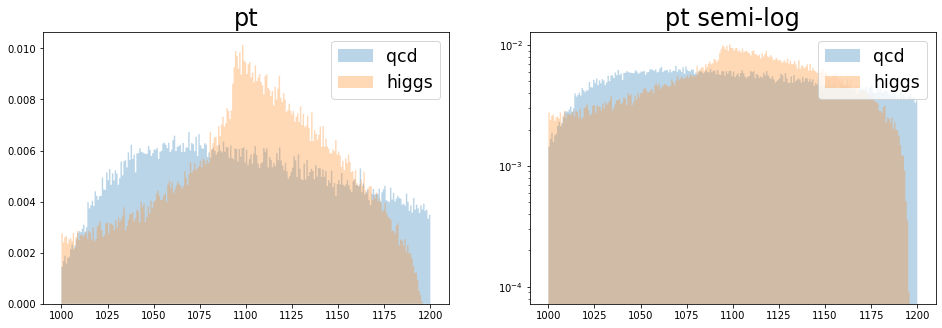

In [103]:
printHistogramComparation('pt')

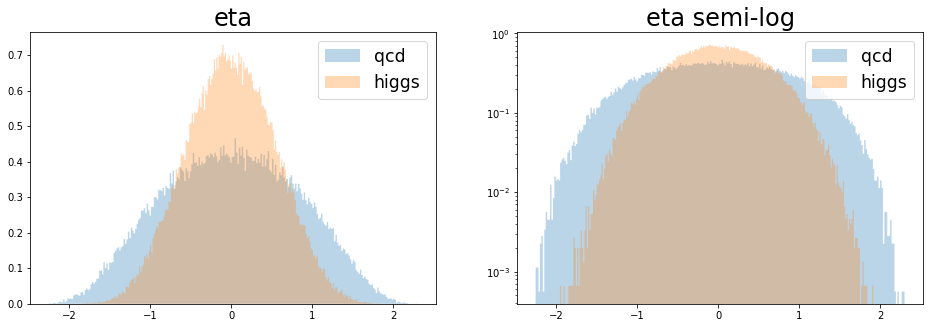

In [105]:
printHistogramComparation('eta')

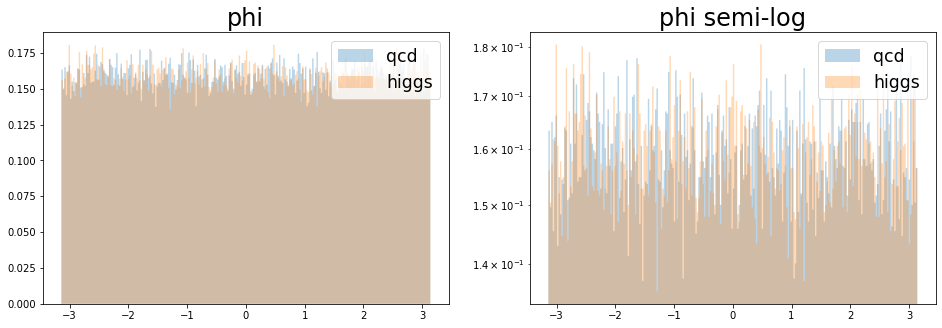

In [106]:
printHistogramComparation('phi')

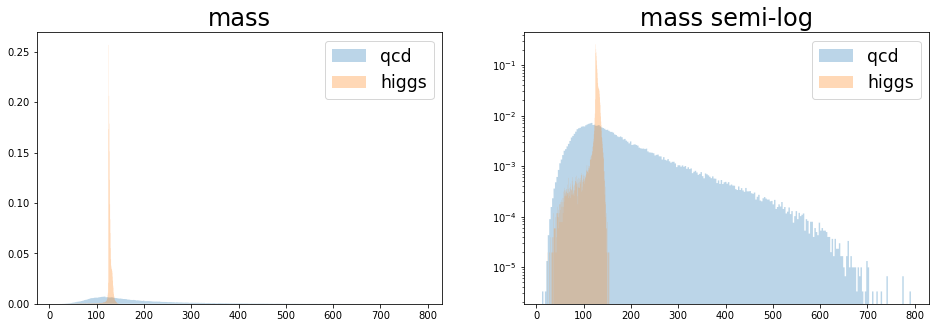

In [107]:
printHistogramComparation('mass')

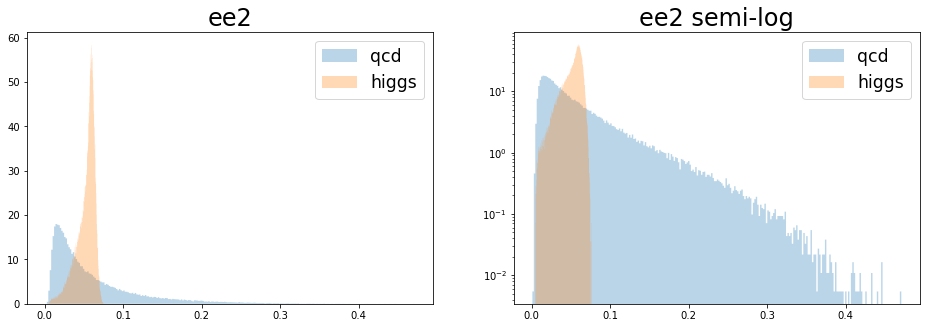

In [108]:
printHistogramComparation('ee2')

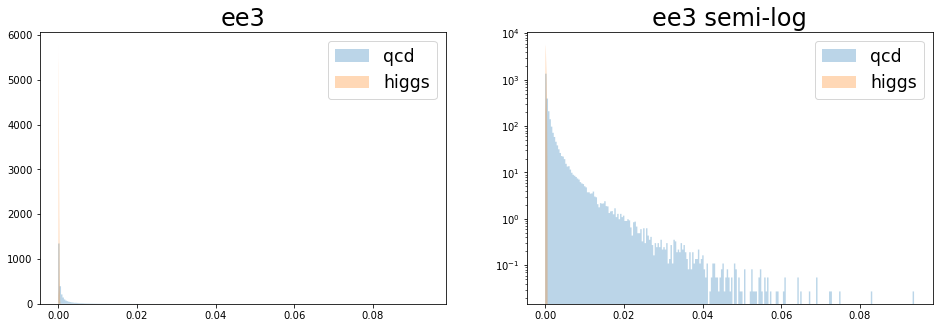

In [109]:
printHistogramComparation('ee3')

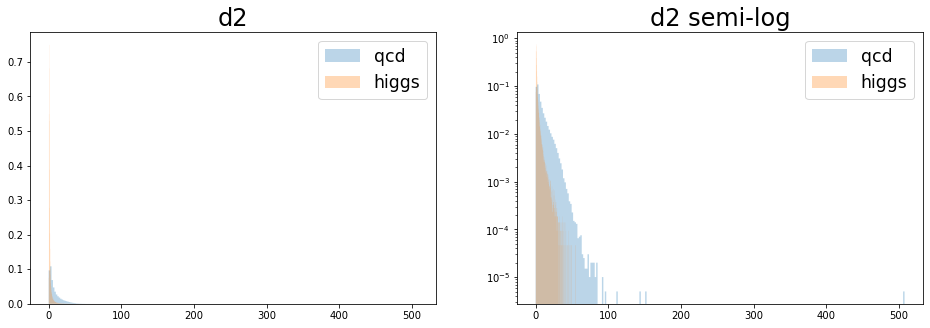

In [110]:
printHistogramComparation('d2')

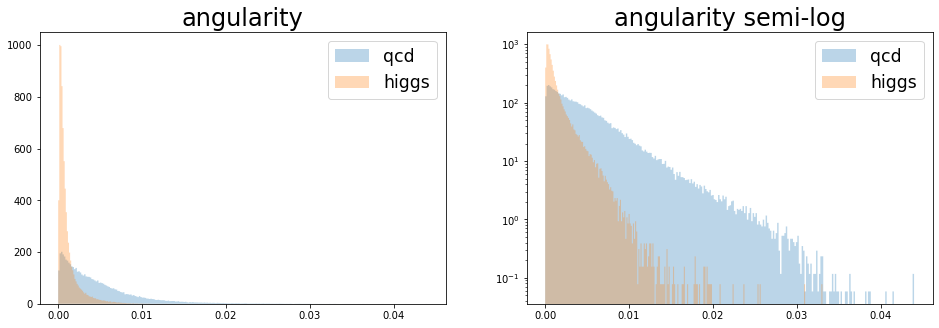

In [111]:
printHistogramComparation('angularity')

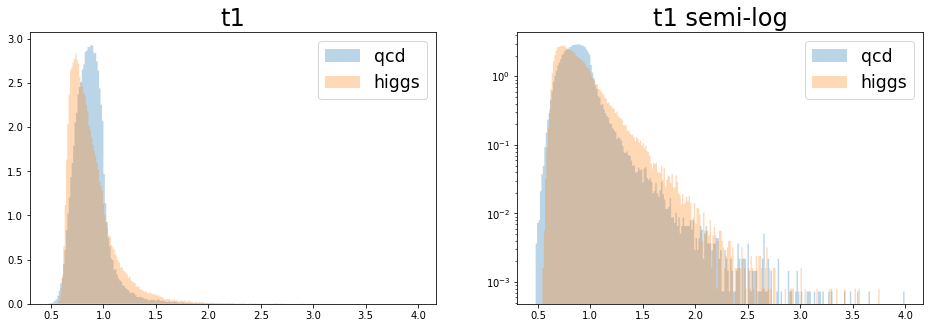

In [112]:
printHistogramComparation('t1')

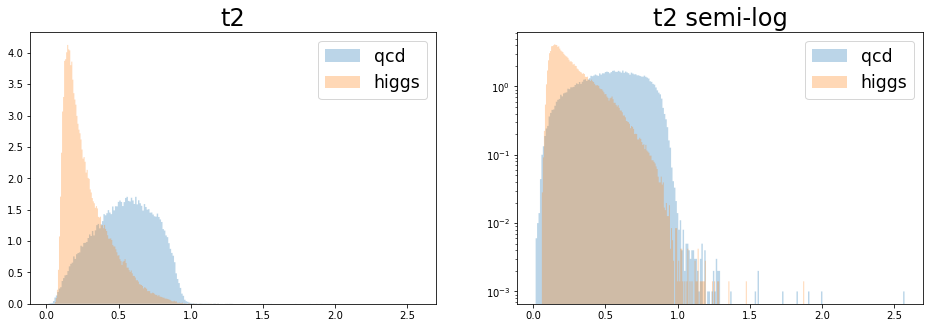

In [113]:
printHistogramComparation('t2')

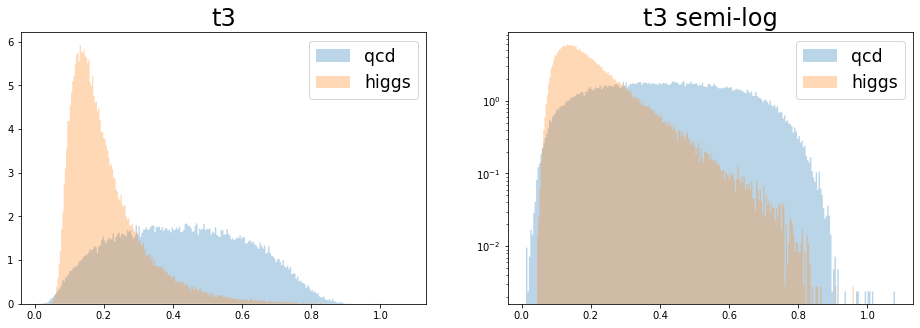

In [114]:
printHistogramComparation('t3')

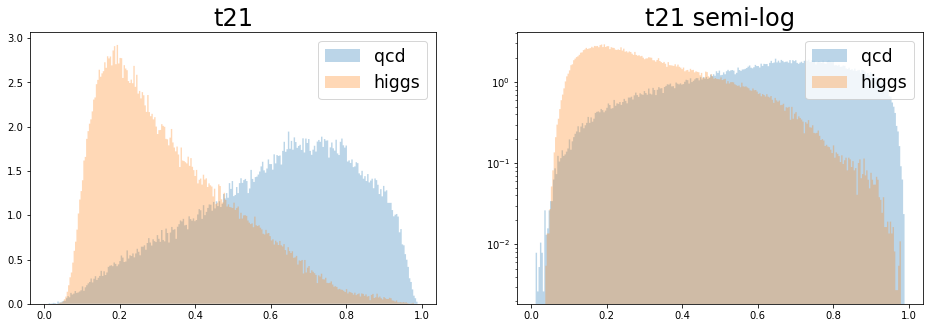

In [115]:
printHistogramComparation('t21')

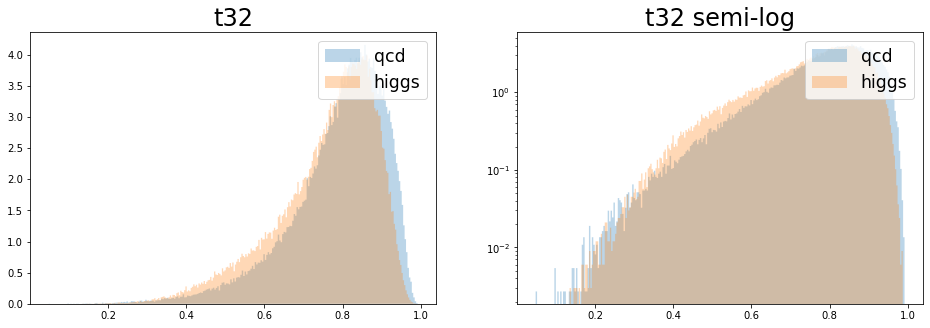

In [116]:
printHistogramComparation('t32')

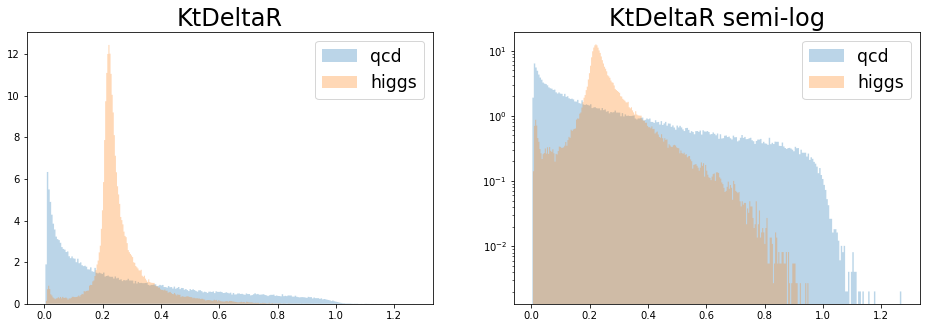

In [117]:
printHistogramComparation('KtDeltaR')

**- These plots compared the distribution of qcd data and Higgs data. Some feature have very distinctive distribution than the other, such as mass, ee2, ee3, d2, angularity, and KtDeltaR. Some feature's difference is not that obvious, such as pt, eta,t2, t3, and t21. While some feature have a very similar distribution which basically can't tell the difference amount qcd and higgs datasets, such as phi, t1, and t32.**
<br> **- Except phi, t1, and t32 features that are almost impossible to distinguish the difference between background and signal, rest of the features all provides various degree of discrimination power amount datasets.**

## 2. Check for correlations among features
In this part, I will check the correlations among each pairs of feature. Since there could be 72 different comparisons, for simplicity, I will only show the graph for pairs that shows a high correlations.
<br> I defined two function as following.
<br> **allCorrelationsOf** is a tool to print all of the correlations of other features related to the current one, for efficiently check for correlations.
<br> **correlationOf** is a function to print a the correlation of the indicated feature pair.

In [193]:
def allCorrelationsOf(x):
    fig, ax = plt.subplots(1,14)
    fig.set_size_inches(60,5)
    for i in range(x, 14):
        ax[i].scatter(qcd[keys[x]],qcd[keys[i]],label='QCD',alpha=0.05)
        ax[i].scatter(higgs[keys[x]],higgs[keys[i]],label='Higgs',alpha=0.01)
        ax[i].set_title(str(keys[x] + ' vs ' + keys[i]))
        ax[i].legend()

def correlationOf(a, b):
    plt.scatter(qcd.get(a),qcd.get(b),label='QCD',alpha=0.05)
    plt.scatter(higgs.get(a),higgs.get(b),label='Higgs',alpha=0.02)
    plt.title(str(a + ' vs ' + b), fontsize=24)
    plt.legend()

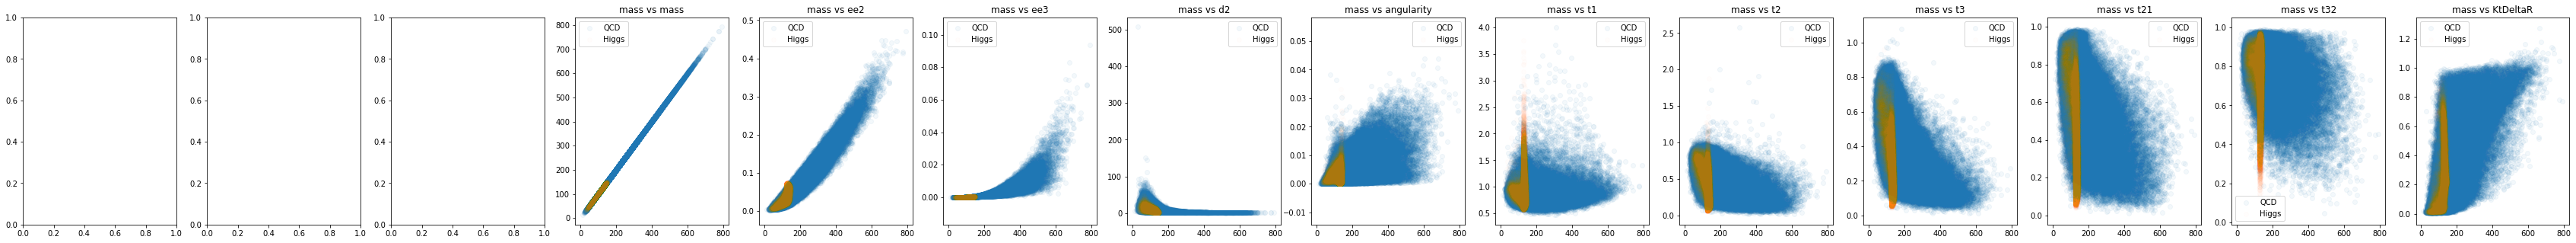

In [188]:
allCorrelationsOf(3)

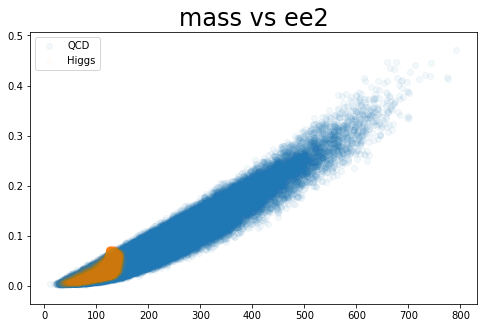

In [194]:
correlationOf('mass', 'ee2')

mass and ee2 definitely exist a correlation, especially in qcd dataset. The relation is linear.

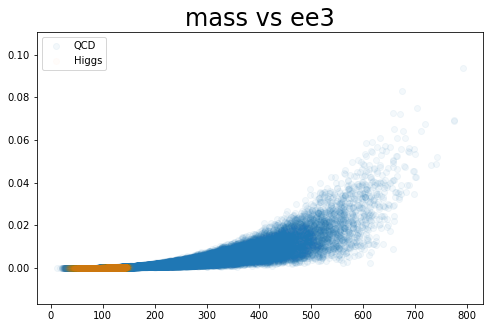

In [195]:
correlationOf('mass', 'ee3')

mass and ee3 also exist a correlation in qcd dataset, but it is very week. The correlation only start to show up when mass is greater than 300 GeV.

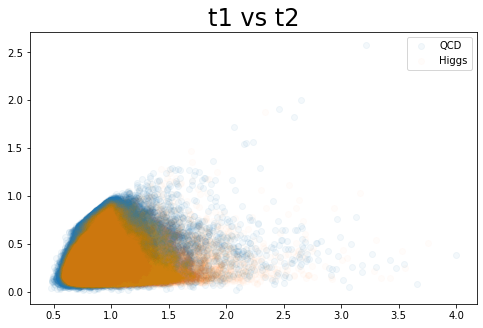

In [196]:
correlationOf('t1', 't2')

t1 and t2 exist a liear correlation for both qcd and higgs, and the variance increase as t1 increases.

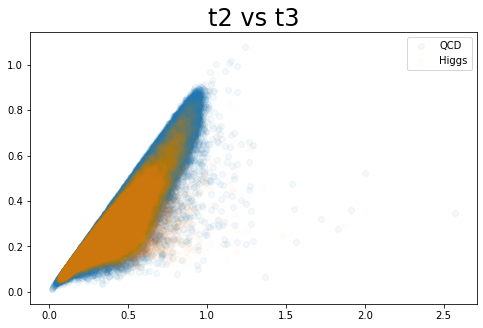

In [197]:
correlationOf('t2', 't3')

t2 and t3 exist a a linear correlation for both qcd and higgs with constant variance.

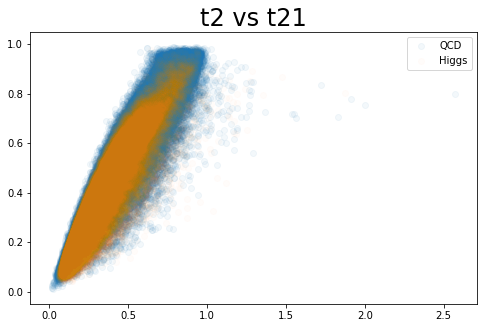

In [198]:
correlationOf('t2', 't21')

t2 and t21 exist a a linear correlation for both qcd and higgs with constant variance. The reason for this is very obvious, as the ratio t21 involves the value of t2.

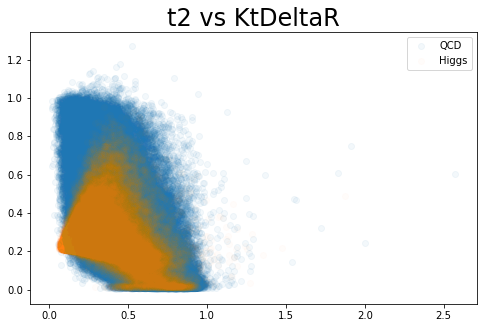

In [199]:
correlationOf('t2', 'KtDeltaR')

t2 and KtDeltaR exist a seemingly liear correlation for both qcd and higgs with a non-constant variance. The variance increase as t2 increases.

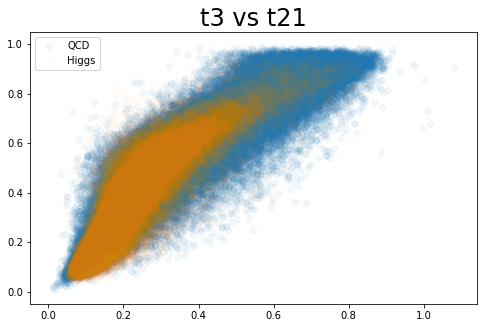

In [200]:
correlationOf('t3', 't21')

t3 and t21 exist a a linear correlation for both qcd and higgs with constant variance.

## 3. & 4. Discovery sensitivity of High PT sample and Future Plan
<br> For the higgs and qcd data in pt range of 1000~1200, the expected yields N_higgs is 50, and the expected yields N_qcd is 2000.
<br> Since the total expected events is 2000 + 50 = 2050, **the sensitivity is 50/2050=2.439%**

In order to increase the sensitivity, we want to **make a cut** on the observation range, in a way that tries to **eliminate the background as much as possible while preseving the most of signal**. In such case, we will **reduce the expected events from background and preserve the most of expected events from higgs(signal)**.

A possible plan in the real world can be:
 - Make observation on the experiment and record all of data with pt in range 1000-1200 (For my case)
 - Utilize the features that have high discrimination power (such as mass, ee2, ee3) to make cut. For example, filter out all observations that have mass greater than (approximately) 160
 - Varify whether the number of observation is consistant with the expected total events.
 <br> 
 <br> 
 <br> 

# Lab 7
### **1.** Make a stacked histogram plot for the feature variable: mass

Text(0.5, 1.0, 'Stacked Histogram for Mass')

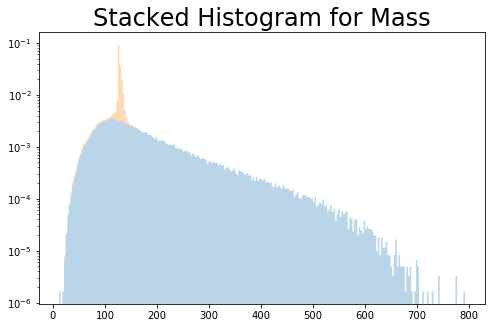

In [272]:
_ = plt.hist([qcd.get("mass"), higgs.get("mass")], **kwargs, label='stack', stacked = True)
plt.yscale("log")
plt.title("Stacked Histogram for Mass", fontsize = 24)

The expected significance without cut is just 50/2050=2.439%.

### **2.** Identify mass cuts to optimize the expected significance.

In [229]:
def significantWithCut(x, y):
    b = qcd.get("mass")
    s = higgs.get("mass")
    bCount, sCount = 0, 0
    for i in range(100000):
        if b[i] > x and b[i] < y: bCount += 1
        if s[i] > x and s[i] < y: sCount += 1
    bExp = bCount/100000.0 * 2000
    sExp = sCount/100000.0 * 50
    result = sExp/(bExp + sExp) * 100
    print("The expected significant with mass cut", x, "~", y, "is", result, "%")

In [230]:
significantWithCut(100, 200)

The expected significant with mass cut 100 ~ 200 is 4.59693112877661 %


In [268]:
significantWithCut(120, 140)

The expected significant with mass cut 120 ~ 140 is 15.98119563155925 %


In [267]:
significantWithCut(124, 127)

The expected significant with mass cut 124 ~ 127 is 38.36238949020904 %


By repeatedly narrowing the cut interval, I fould the highest significance is correspond to a **cut of mass of 124 to 127**,, which yield a significance of 38.35%.

### **3.** Make stacked histogram plots for the reset of features

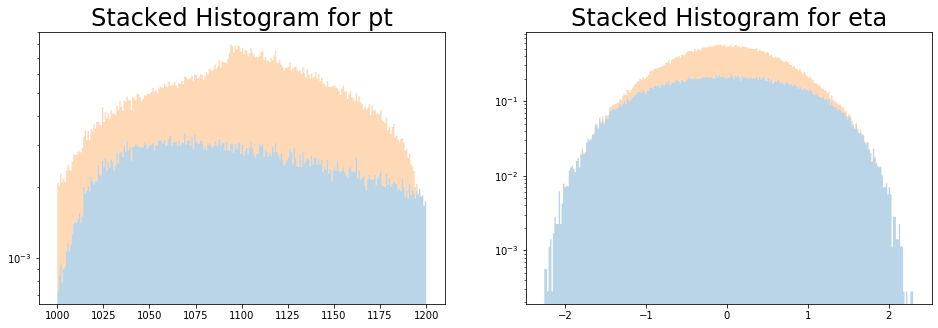

In [341]:
def printOriginalStacked(one, two):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    ax[0].hist([qcd.get(one), higgs.get(one)], **kwargs, label='stack', stacked = True)
    ax[0].set_title("Stacked Histogram for " + one, fontsize=24)
    ax[0].set_yscale("log")
    ax[1].hist([qcd.get(two), higgs.get(two)], **kwargs, label='stack', stacked = True)
    ax[1].set_title("Stacked Histogram for " + two, fontsize=24)
    ax[1].set_yscale("log")
printOriginalStacked('pt', 'eta')

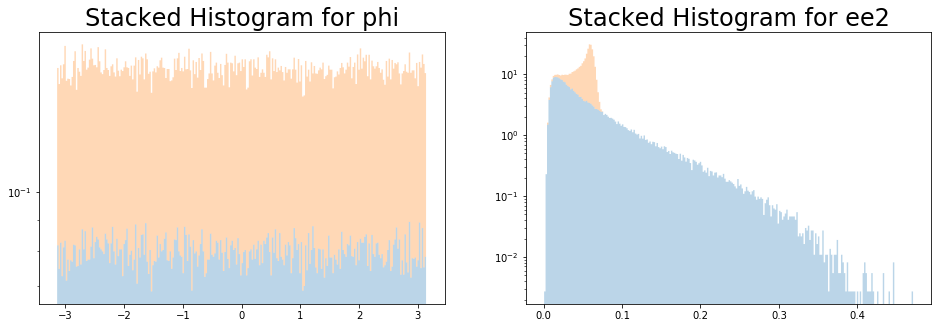

In [277]:
printOriginalStacked('phi', 'ee2')

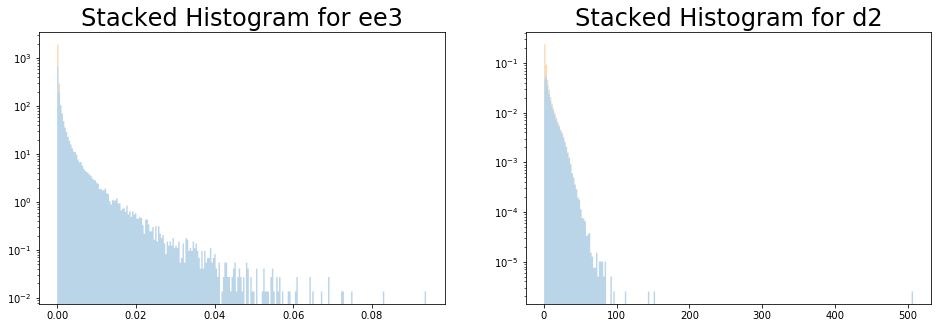

In [278]:
printOriginalStacked('ee3', 'd2')

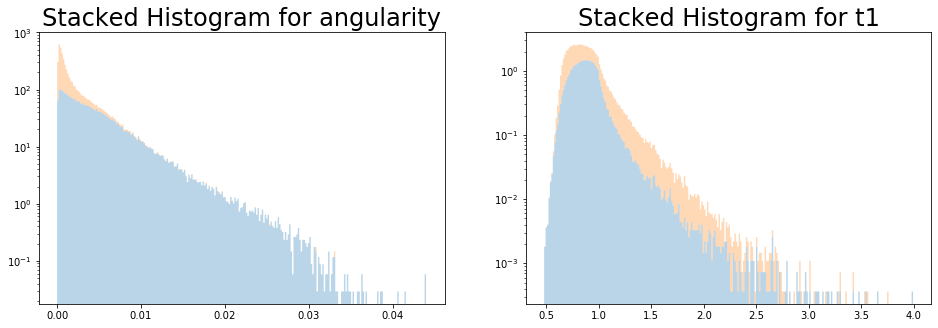

In [342]:
printOriginalStacked('angularity', 't1')

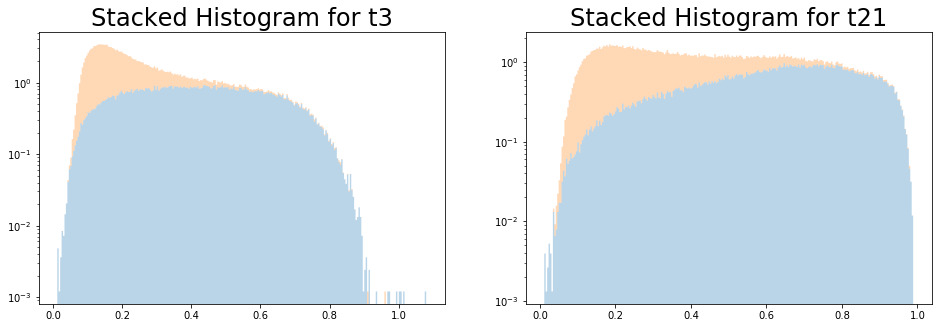

In [280]:
printOriginalStacked('t3', 't21')

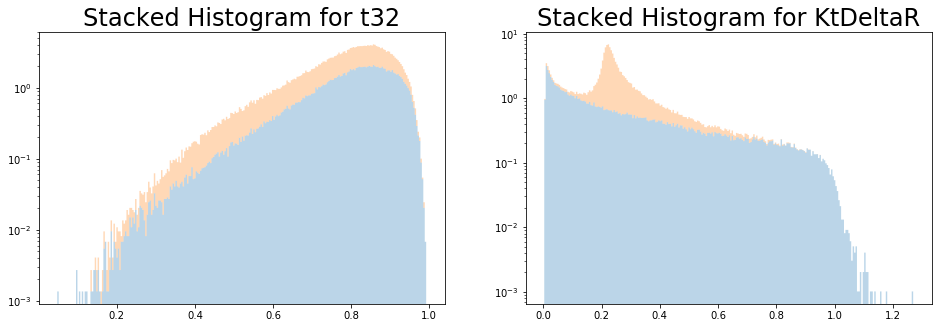

In [281]:
printOriginalStacked('t32', 'KtDeltaR')

#### By inspection, I think ee2 and ee3 also have a very strong discrimination power.
#### I will test their signficance with cut as below.

In [336]:
b = qcd.get("ee2")
s = higgs.get("ee2")
bCount, sCount = 0, 0
for i in range(100000):
    if b[i] > 0.059 and b[i] < 0.062: bCount += 1
    if s[i] > 0.059 and s[i] < 0.062: sCount += 1
bExp = bCount/100000.0 * 2000
sExp = sCount/100000.0 * 50
result = sExp/(bExp + sExp) * 100
print("The expected significant with ee2 cut", 0.059, "~", 0.062, "is", result, "%")

The expected significant with ee2 cut 0.059 ~ 0.062 is 17.42493913984312 %


**ee2 is pretty good, but it is not as powerful as mass.**

<br> **For ee3, zoom in, we can see the graph as follow**

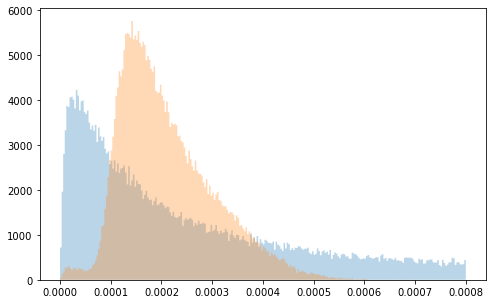

In [339]:
_ = plt.hist(qcd.get("ee3"), **kwargs, label='higgs', range = (0, 0.0008))
_ = plt.hist(higgs.get("ee3"), **kwargs, label='higgs', range = (0, 0.0008))

From this graph, we can inspect that 0.00018 ~ 0.0002 may be a good cut, and the significance is calculate as follow.

In [511]:
b = qcd.get("ee3")
s = higgs.get("ee3")
bCount, sCount = 0, 0
for i in range(100000):
    if b[i] > 0.00018 and b[i] < 0.0002: bCount += 1
    if s[i] > 0.00018 and s[i] < 0.0002: sCount += 1
bExp = bCount/100000.0 * 2000
sExp = sCount/100000.0 * 50
result = sExp/(bExp + sExp) * 100
print("The expected significance with ee3 cut", 0.00018, "~", 0.0002, "is", result, "%")

The expected significance with ee3 cut 0.00018 ~ 0.0002 is 8.895904160595759 %


**ee3 is even lesser powerful than ee2**
<br> **Overall, I did not find another feature as discriminative as mass**

### plots stacked histogram after making optimal mass cuts

In [370]:
#Calculate cut
backpt, backeta, backphi, backmass, backee2, backee3, backd2, backangularity, backt1, backt2, backt3, backt21, backt32, backKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []
sigpt, sigeta, sigphi, sigmass, sigee2, sigee3, sigd2, sigangularity, sigt1, sigt2, sigt3, sigt21, sigt32, sigKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []

b = qcd.get("mass")
s = higgs.get("mass")
for i in range(100000):
    if b[i] > 124 and b[i] < 127:
        backpt.append(qcd.get("pt")[i])
        backeta.append(qcd.get("eta")[i])
        backphi.append(qcd.get("phi")[i])
        backmass.append(qcd.get("mass")[i])
        backee2.append(qcd.get("ee2")[i])
        backee3.append(qcd.get("ee3")[i])
        backd2.append(qcd.get("d2")[i])
        backangularity.append(qcd.get("angularity")[i])
        backt1.append(qcd.get("t1")[i])
        backt2.append(qcd.get("t2")[i])
        backt3.append(qcd.get("t3")[i])
        backt21.append(qcd.get("t21")[i])
        backt32.append(qcd.get("t32")[i])
        backKtDeltaR.append(qcd.get("KtDeltaR")[i])
    if s[i] > 124 and s[i] < 127:
        sigpt.append(qcd.get("pt")[i])
        sigeta.append(higgs.get("eta")[i])
        sigphi.append(higgs.get("phi")[i])
        sigmass.append(higgs.get("mass")[i])
        sigee2.append(higgs.get("ee2")[i])
        sigee3.append(higgs.get("ee3")[i])
        sigd2.append(higgs.get("d2")[i])
        sigangularity.append(higgs.get("angularity")[i])
        sigt1.append(higgs.get("t1")[i])
        sigt2.append(higgs.get("t2")[i])
        sigt3.append(higgs.get("t3")[i])
        sigt21.append(higgs.get("t21")[i])
        sigt32.append(higgs.get("t32")[i])
        sigKtDeltaR.append(higgs.get("KtDeltaR")[i])

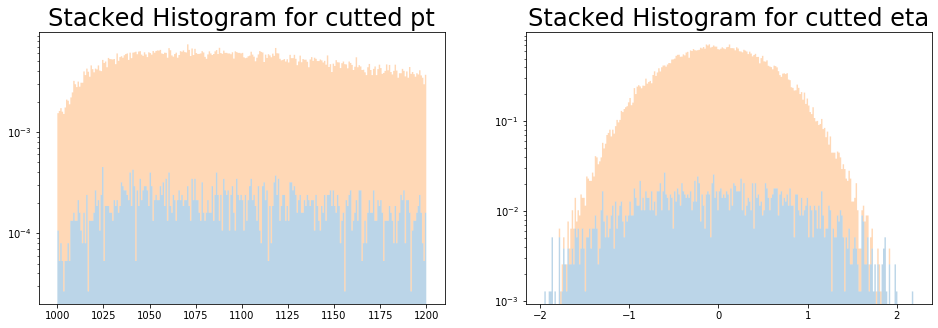

In [361]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backpt, sigpt], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted pt", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backeta, sigeta], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted eta", fontsize=24)
ax[1].set_yscale("log")

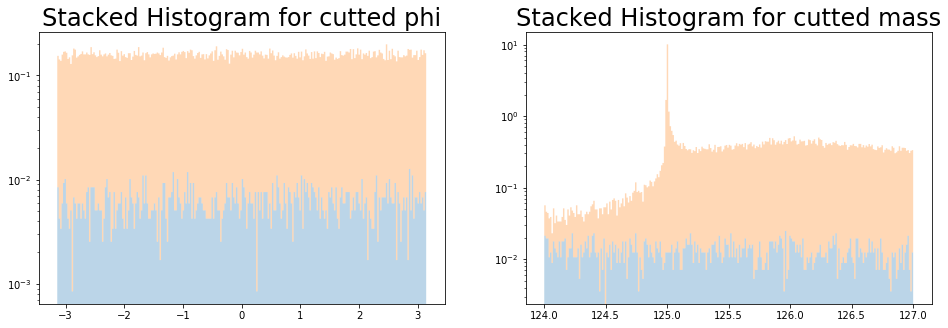

In [362]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backphi, sigphi], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted phi", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backmass, sigmass], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted mass", fontsize=24)
ax[1].set_yscale("log")

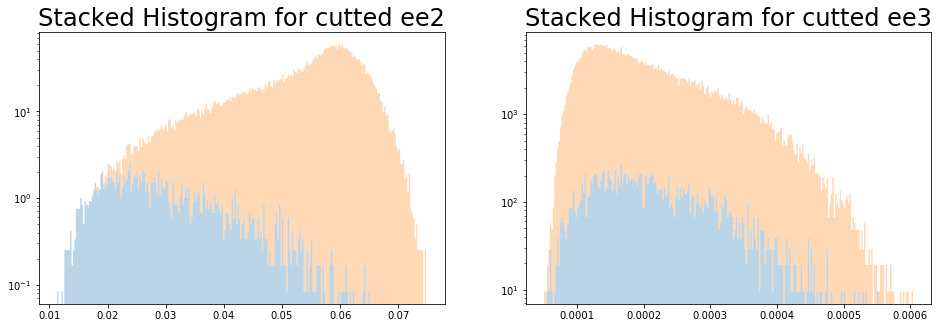

In [363]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backee2, sigee2], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted ee2", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backee3, sigee3], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted ee3", fontsize=24)
ax[1].set_yscale("log")

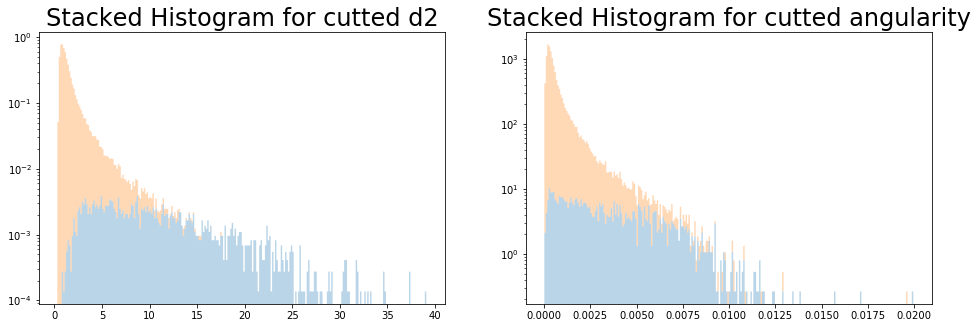

In [364]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backd2, sigd2], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted d2", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backangularity, sigangularity], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted angularity", fontsize=24)
ax[1].set_yscale("log")

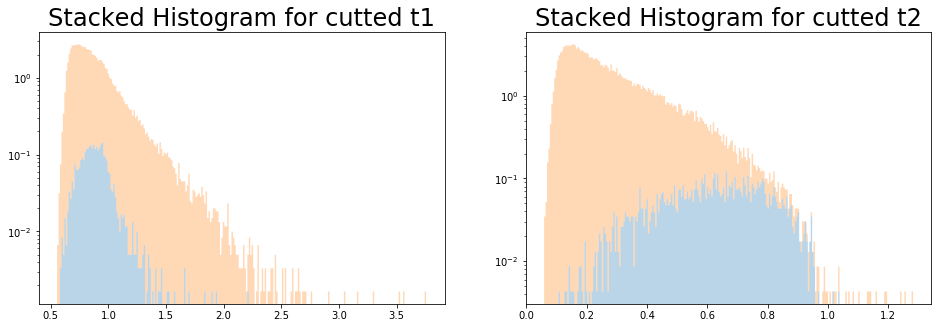

In [365]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backt1, sigt1], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted t1", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backt2, sigt2], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted t2", fontsize=24)
ax[1].set_yscale("log")

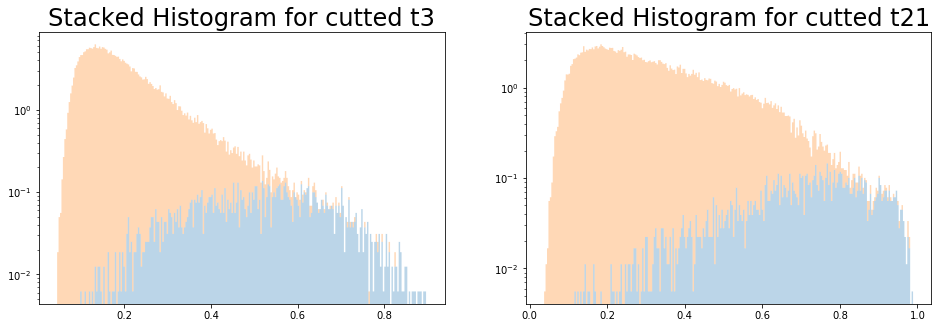

In [366]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backt3, sigt3], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted t3", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backt21, sigt21], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted t21", fontsize=24)
ax[1].set_yscale("log")

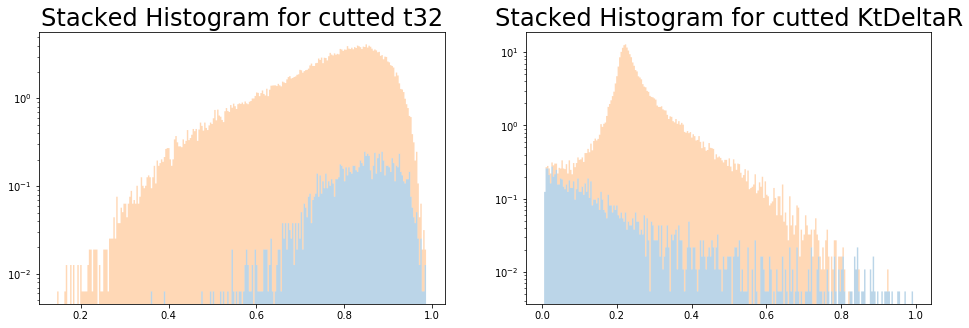

In [371]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax[0].hist([backt32, sigt32], **kwargs, label='stack', stacked = True)
ax[0].set_title("Stacked Histogram for cutted t32", fontsize=24)
ax[0].set_yscale("log")
ax[1].hist([backKtDeltaR, sigKtDeltaR], **kwargs, label='stack', stacked = True)
ax[1].set_title("Stacked Histogram for cutted KtDeltaR", fontsize=24)
ax[1].set_yscale("log")

#### Based on aboves plots, ee2, t1, and t32 feature are all possible to further improve the significance.

## 4. Optimize event selections using multiple features
Based on the aboves finding, I am going to pick ee2 to further improve the significance.

In [375]:
b = backee2
s = sigee2
bCount, sCount = 0, 0
for i in range(len(backee2)):
    if b[i] > 0.067: bCount += 1
for i in range(len(sigee2)):       
    if s[i] > 0.067: sCount += 1
bExp = bCount/100000.0 * 2000
sExp = sCount/100000.0 * 50
result = sExp/(bExp + sExp) * 100
print("The expected significant with ee2 cut >", 0.067, "is", result, "%")

The expected significant with ee2 cut > 0.067 is 100.0 %


**I actually achieved a theoretical 100% significance.** (Not sure If I am correct)

# Lab 8

In [388]:
high = pandas.read_hdf('data_highLumi_pt_1000_1200.h5')
low = pandas.read_hdf('data_lowLumi_pt_1000_1200.h5')

## 1. High luminosity data

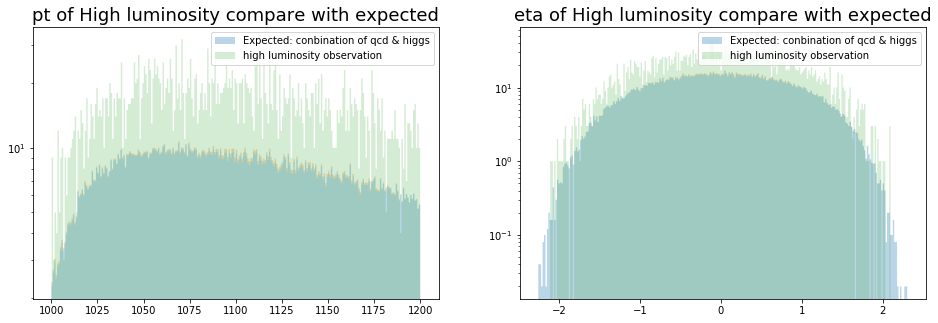

In [420]:
def highCompareOriginal(a, b):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    qcdscale, higgsscale = np.ones(100000), np.ones(100000)
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[0].hist([qcd.get(a), higgs.get(a)], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[0].set_title(a + " of High luminosity compare with expected", fontsize=18)
    ax[0].set_yscale("log")
    _ = ax[0].hist(high[a], histtype='stepfilled', alpha=0.2, bins=256, label='high luminosity observation')
    ax[0].legend()

    ax[1].hist([qcd.get(b), higgs.get(b)], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[1].set_title(b + " of High luminosity compare with expected", fontsize=18)
    ax[1].set_yscale("log")
    _ = ax[1].hist(high[b], histtype='stepfilled', alpha=0.2, bins=256, label='high luminosity observation')
    ax[1].legend()
highCompareOriginal('pt', 'eta')

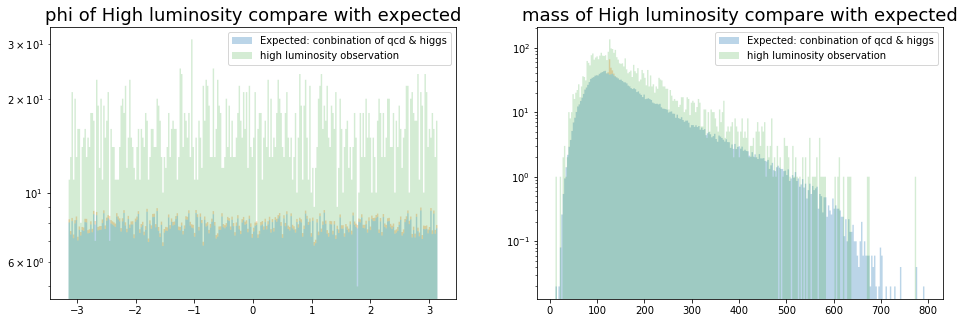

In [421]:
highCompareOriginal('phi', 'mass')

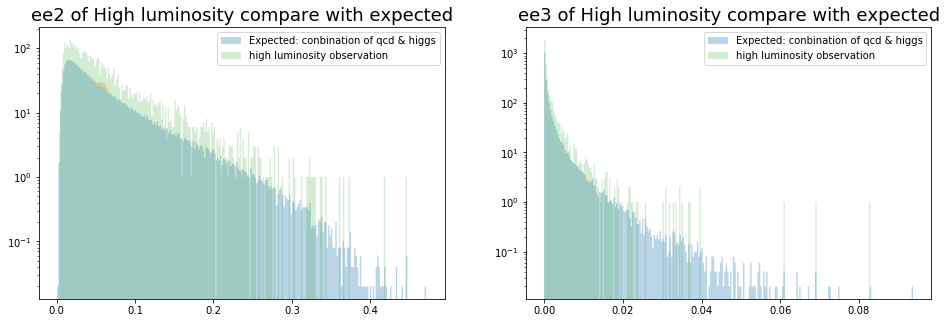

In [422]:
highCompareOriginal('ee2', 'ee3')

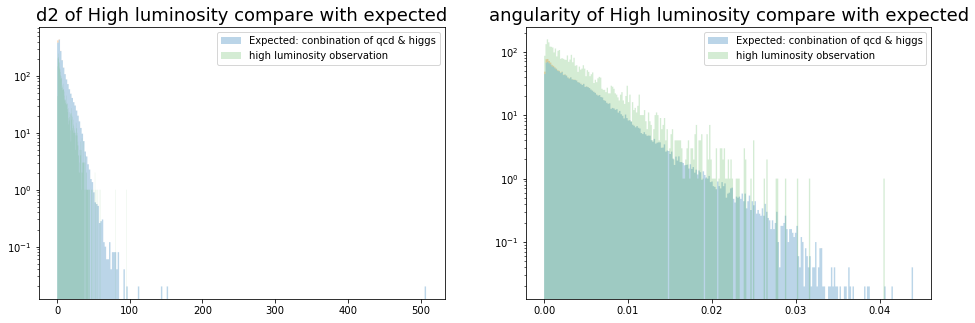

In [423]:
highCompareOriginal('d2', 'angularity')

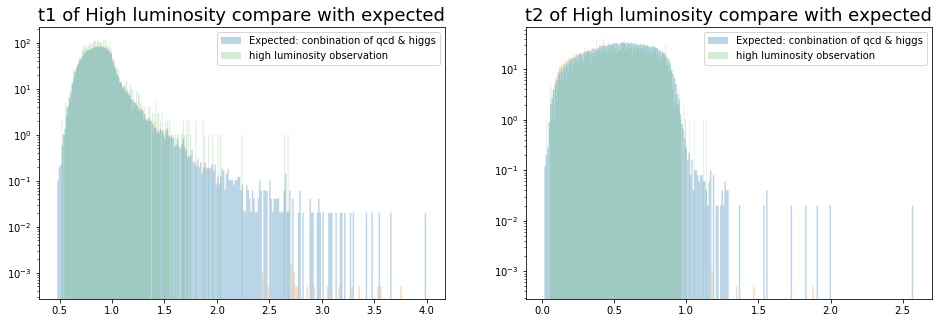

In [424]:
highCompareOriginal('t1', 't2')

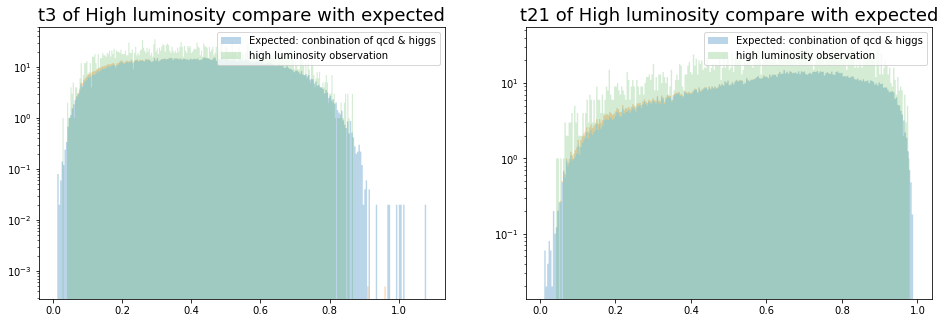

In [425]:
highCompareOriginal('t3', 't21')

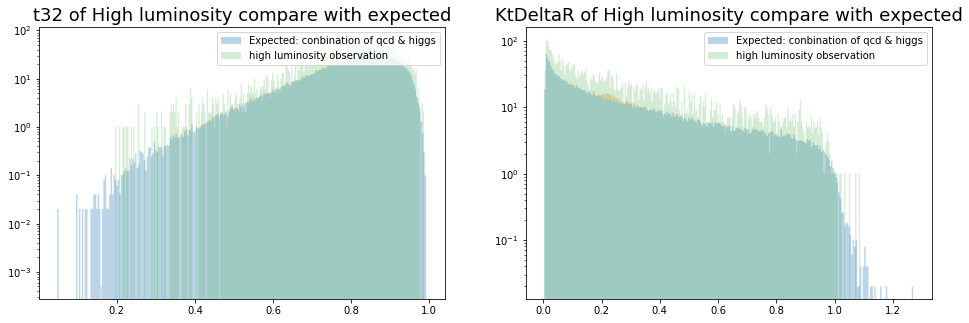

In [426]:
highCompareOriginal('t32', 'KtDeltaR')

### Next, plot High luminosity data overlap with expected signal and background (normalized to observed yields) with optimal event selection.
In this section, for simplicity, I will just the mass cut determined in the lab 7, that a cut of 124 ~ 127 for mass value.

In [473]:
highcut = high
for i in range(len(highcut)):
    if highcut["mass"][i] <= 124 or highcut["mass"][i] >= 127:
        highcut = highcut.drop([i])
#Calculate expected cutted distribution
backpt, backeta, backphi, backmass, backee2, backee3, backd2, backangularity, backt1, backt2, backt3, backt21, backt32, backKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []
sigpt, sigeta, sigphi, sigmass, sigee2, sigee3, sigd2, sigangularity, sigt1, sigt2, sigt3, sigt21, sigt32, sigKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []

b = qcd.get("mass")
s = higgs.get("mass")
for i in range(100000):
    if b[i] > 124 and b[i] < 127:
        backpt.append(qcd.get("pt")[i])
        backeta.append(qcd.get("eta")[i])
        backphi.append(qcd.get("phi")[i])
        backmass.append(qcd.get("mass")[i])
        backee2.append(qcd.get("ee2")[i])
        backee3.append(qcd.get("ee3")[i])
        backd2.append(qcd.get("d2")[i])
        backangularity.append(qcd.get("angularity")[i])
        backt1.append(qcd.get("t1")[i])
        backt2.append(qcd.get("t2")[i])
        backt3.append(qcd.get("t3")[i])
        backt21.append(qcd.get("t21")[i])
        backt32.append(qcd.get("t32")[i])
        backKtDeltaR.append(qcd.get("KtDeltaR")[i])
    if s[i] > 124 and s[i] < 127:
        sigpt.append(qcd.get("pt")[i])
        sigeta.append(higgs.get("eta")[i])
        sigphi.append(higgs.get("phi")[i])
        sigmass.append(higgs.get("mass")[i])
        sigee2.append(higgs.get("ee2")[i])
        sigee3.append(higgs.get("ee3")[i])
        sigd2.append(higgs.get("d2")[i])
        sigangularity.append(higgs.get("angularity")[i])
        sigt1.append(higgs.get("t1")[i])
        sigt2.append(higgs.get("t2")[i])
        sigt3.append(higgs.get("t3")[i])
        sigt21.append(higgs.get("t21")[i])
        sigt32.append(higgs.get("t32")[i])
        sigKtDeltaR.append(higgs.get("KtDeltaR")[i])

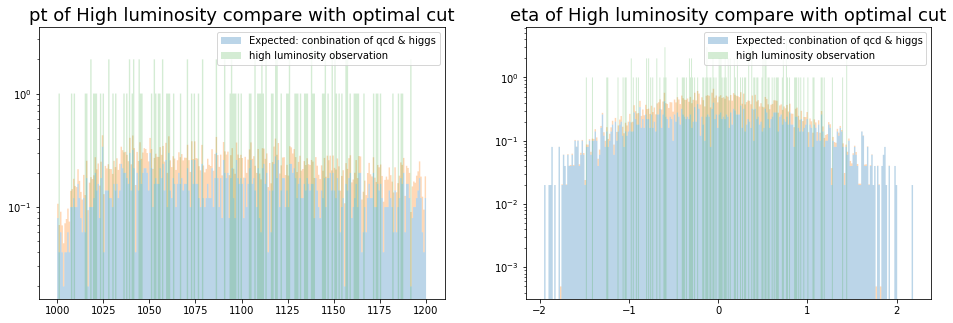

In [478]:
def highCompareCut(a, b, c, x, y, z):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    qcdscale, higgsscale = np.ones(len(b)), np.ones(len(c))
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[0].hist([b, c], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[0].set_title(a + " of High luminosity compare with optimal cut", fontsize=18)
    ax[0].set_yscale("log")
    _ = ax[0].hist(highcut[a], histtype='stepfilled', alpha=0.2, bins=256, label='high luminosity observation')
    ax[0].legend()

    qcdscale, higgsscale = np.ones(len(y)), np.ones(len(z))
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[1].hist([y, z], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[1].set_title(x + " of High luminosity compare with optimal cut", fontsize=18)
    ax[1].set_yscale("log")
    _ = ax[1].hist(highcut[x], histtype='stepfilled', alpha=0.2, bins=256, label='high luminosity observation')
    ax[1].legend()
highCompareCut('pt',backpt, sigpt, 'eta', backeta, sigeta)

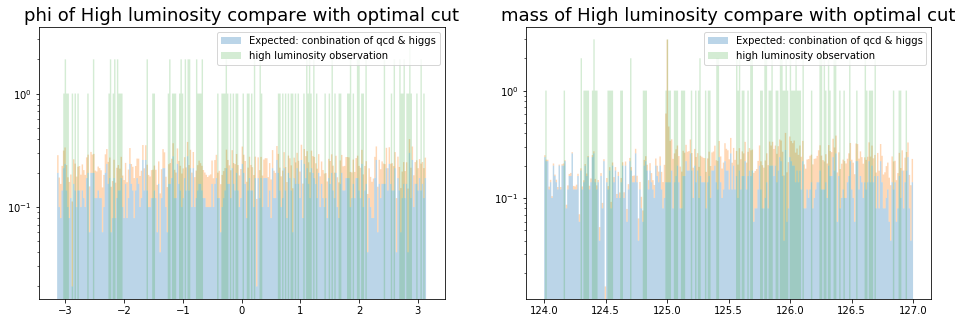

In [479]:
highCompareCut('phi',backphi, sigphi, 'mass', backmass, sigmass)

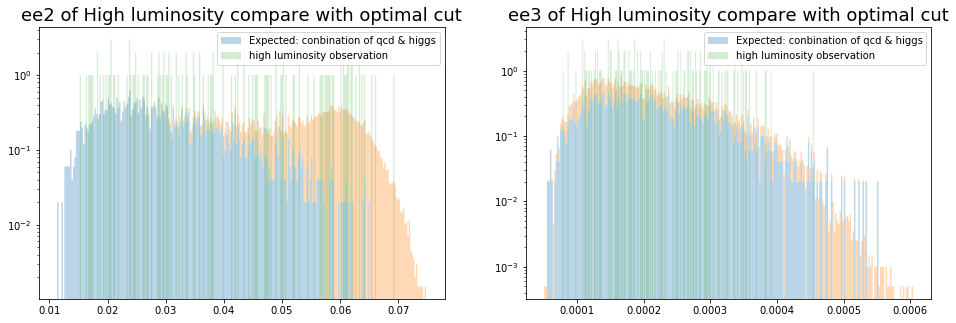

In [480]:
highCompareCut('ee2',backee2, sigee2, 'ee3', backee3, sigee3)

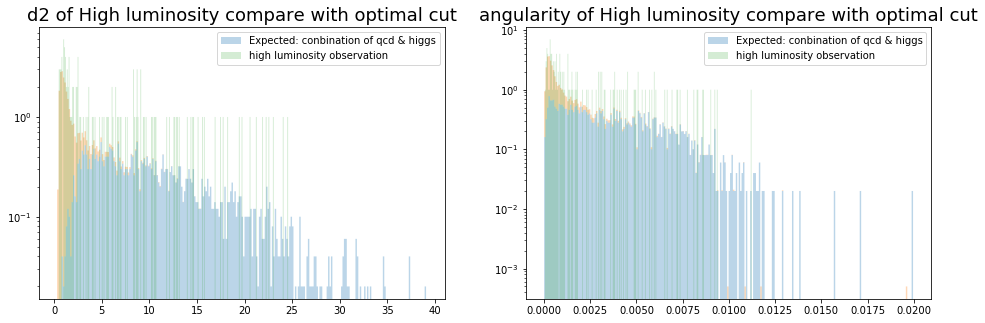

In [481]:
highCompareCut('d2',backd2, sigd2, 'angularity', backangularity, sigangularity)

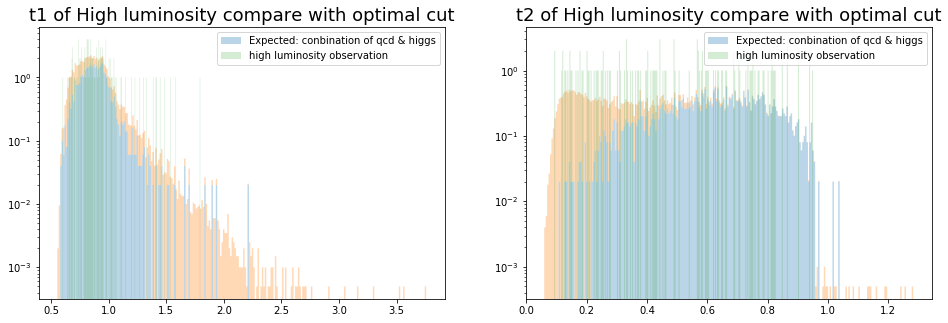

In [482]:
highCompareCut('t1',backt1, sigt1, 't2', backt2, sigt2)

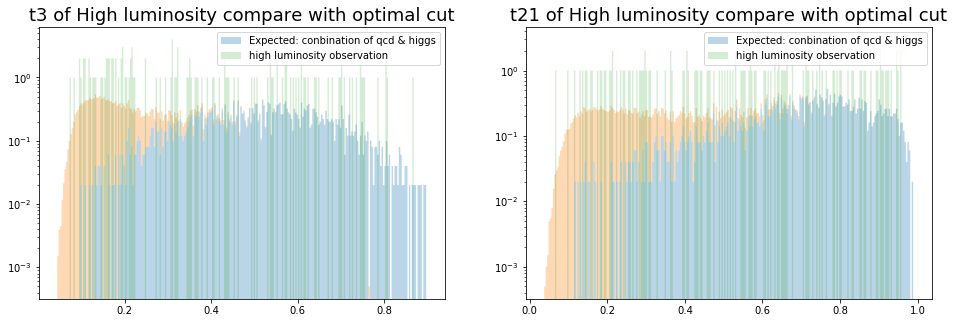

In [483]:
highCompareCut('t3',backt3, sigt3, 't21', backt21, sigt21)

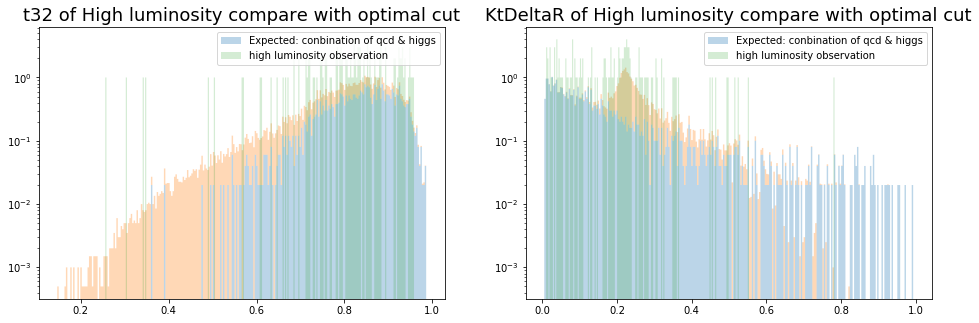

In [484]:
highCompareCut('t32',backt32, sigt32, 'KtDeltaR', backKtDeltaR, sigKtDeltaR)

In [490]:
b = qcd.get("mass")
s = higgs.get("mass")
bCount, sCount = 0, 0
for i in range(100000):
    if b[i] > 124 and b[i] < 127: bCount += 1
    if s[i] > 124 and s[i] < 127: sCount += 1
print("Expected # of background observation is", bCount/100000*2000)
print("Expected # of signal observation is", sCount/100000*50)
print("Expected total # of observation is", bCount/100000*2000 + sCount/100000*50)
print("Total high luminosity observation is", len(highcut))

Expected # of background observation is 37.3
Expected # of signal observation is 23.215
Expected total # of observation is 60.515
Total high luminosity observation is 129


## 2. Low luminosity data

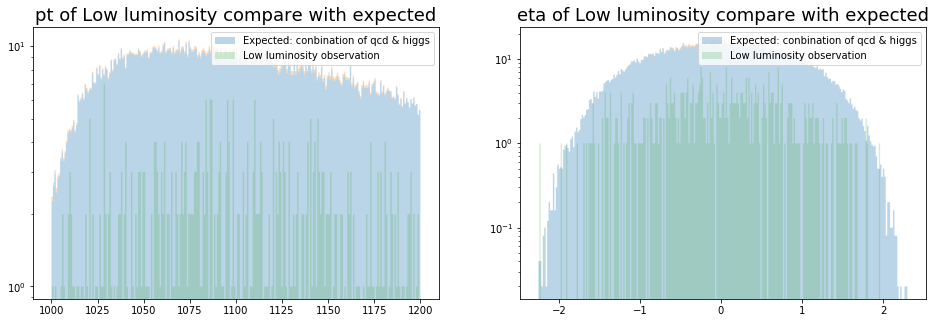

In [491]:
def lowCompareOriginal(a, b):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    qcdscale, higgsscale = np.ones(100000), np.ones(100000)
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[0].hist([qcd.get(a), higgs.get(a)], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[0].set_title(a + " of Low luminosity compare with expected", fontsize=18)
    ax[0].set_yscale("log")
    _ = ax[0].hist(low[a], histtype='stepfilled', alpha=0.2, bins=256, label='Low luminosity observation')
    ax[0].legend()

    ax[1].hist([qcd.get(b), higgs.get(b)], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[1].set_title(b + " of Low luminosity compare with expected", fontsize=18)
    ax[1].set_yscale("log")
    _ = ax[1].hist(low[b], histtype='stepfilled', alpha=0.2, bins=256, label='Low luminosity observation')
    ax[1].legend()
lowCompareOriginal('pt', 'eta')

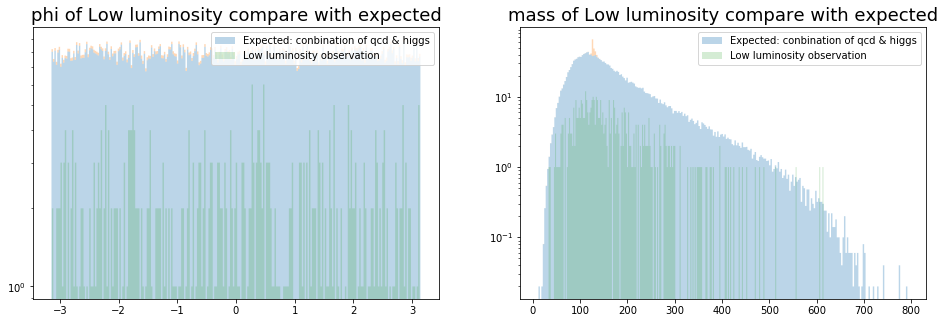

In [492]:
lowCompareOriginal('phi', 'mass')

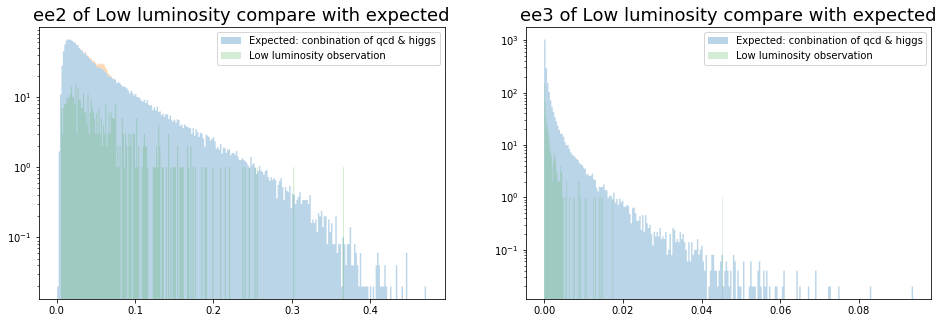

In [493]:
lowCompareOriginal('ee2', 'ee3')

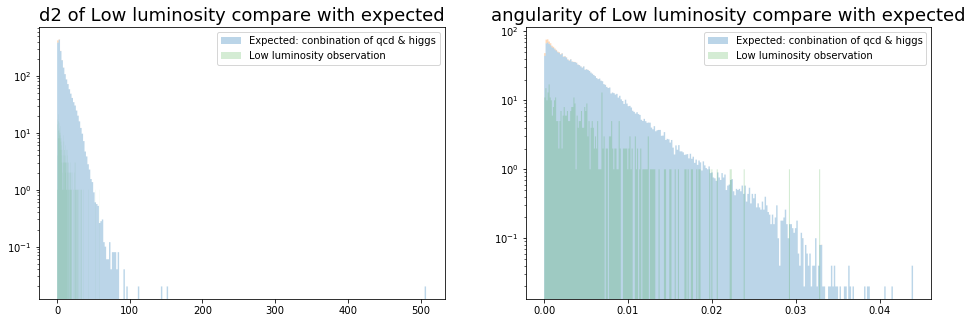

In [494]:
lowCompareOriginal('d2', 'angularity')

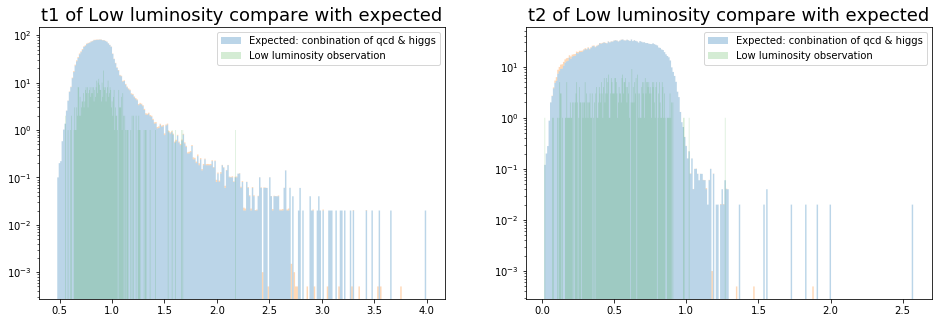

In [495]:
lowCompareOriginal('t1', 't2')

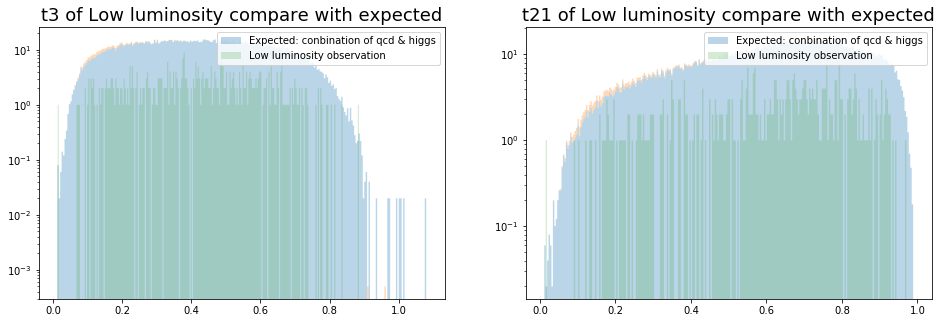

In [496]:
lowCompareOriginal('t3', 't21')


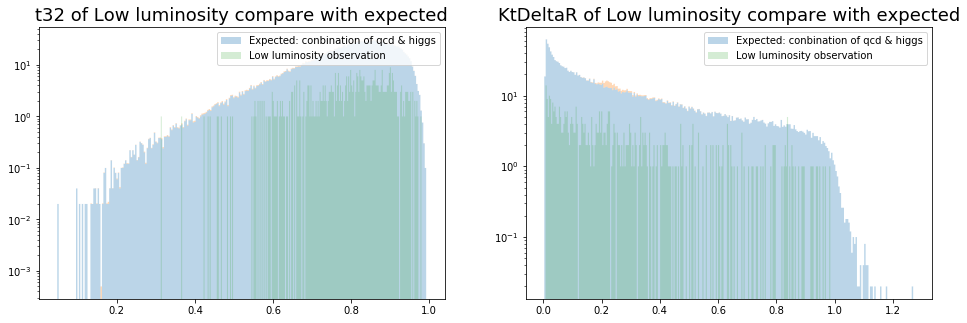

In [497]:
lowCompareOriginal('t32', 'KtDeltaR')

### Next, plot Low luminosity data overlap with expected signal and background (normalized to observed yields) with optimal event selection.
In this section, for simplicity, I will just the mass cut determined in the lab 7, that a cut of 124 ~ 127 for mass value.

In [501]:
lowcut = low
for i in range(len(lowcut)):
    if lowcut["mass"][i] <= 124 or lowcut["mass"][i] >= 127:
        lowcut = lowcut.drop([i])
#Calculate expected cutted distribution
backpt, backeta, backphi, backmass, backee2, backee3, backd2, backangularity, backt1, backt2, backt3, backt21, backt32, backKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []
sigpt, sigeta, sigphi, sigmass, sigee2, sigee3, sigd2, sigangularity, sigt1, sigt2, sigt3, sigt21, sigt32, sigKtDeltaR = [], [], [], [], [], [], [], [], [], [], [], [], [], []

b = qcd.get("mass")
s = higgs.get("mass")
for i in range(100000):
    if b[i] > 124 and b[i] < 127:
        backpt.append(qcd.get("pt")[i])
        backeta.append(qcd.get("eta")[i])
        backphi.append(qcd.get("phi")[i])
        backmass.append(qcd.get("mass")[i])
        backee2.append(qcd.get("ee2")[i])
        backee3.append(qcd.get("ee3")[i])
        backd2.append(qcd.get("d2")[i])
        backangularity.append(qcd.get("angularity")[i])
        backt1.append(qcd.get("t1")[i])
        backt2.append(qcd.get("t2")[i])
        backt3.append(qcd.get("t3")[i])
        backt21.append(qcd.get("t21")[i])
        backt32.append(qcd.get("t32")[i])
        backKtDeltaR.append(qcd.get("KtDeltaR")[i])
    if s[i] > 124 and s[i] < 127:
        sigpt.append(qcd.get("pt")[i])
        sigeta.append(higgs.get("eta")[i])
        sigphi.append(higgs.get("phi")[i])
        sigmass.append(higgs.get("mass")[i])
        sigee2.append(higgs.get("ee2")[i])
        sigee3.append(higgs.get("ee3")[i])
        sigd2.append(higgs.get("d2")[i])
        sigangularity.append(higgs.get("angularity")[i])
        sigt1.append(higgs.get("t1")[i])
        sigt2.append(higgs.get("t2")[i])
        sigt3.append(higgs.get("t3")[i])
        sigt21.append(higgs.get("t21")[i])
        sigt32.append(higgs.get("t32")[i])
        sigKtDeltaR.append(higgs.get("KtDeltaR")[i])

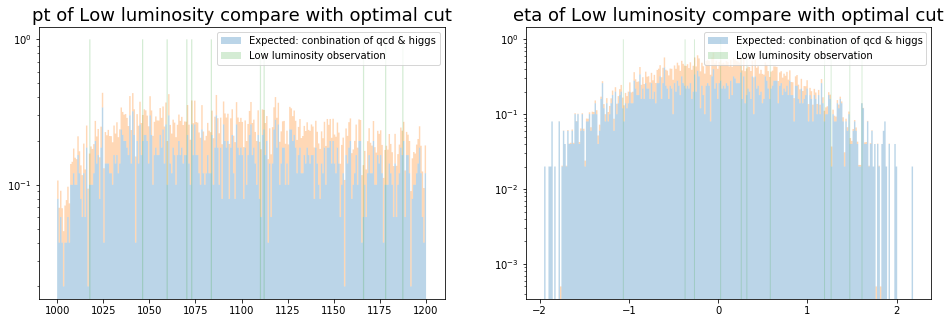

In [502]:
def lowCompareCut(a, b, c, x, y, z):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    qcdscale, higgsscale = np.ones(len(b)), np.ones(len(c))
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[0].hist([b, c], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[0].set_title(a + " of Low luminosity compare with optimal cut", fontsize=18)
    ax[0].set_yscale("log")
    _ = ax[0].hist(lowcut[a], histtype='stepfilled', alpha=0.2, bins=256, label='Low luminosity observation')
    ax[0].legend()

    qcdscale, higgsscale = np.ones(len(y)), np.ones(len(z))
    qcdscale = qcdscale * 2000/100000
    higgsscale = higgsscale * 50/100000
    ax[1].hist([y, z], histtype='stepfilled', alpha=0.3, bins=256, label='Expected: conbination of qcd & higgs', stacked = True, weights = [qcdscale, higgsscale])
    ax[1].set_title(x + " of Low luminosity compare with optimal cut", fontsize=18)
    ax[1].set_yscale("log")
    _ = ax[1].hist(lowcut[x], histtype='stepfilled', alpha=0.2, bins=256, label='Low luminosity observation')
    ax[1].legend()
lowCompareCut('pt',backpt, sigpt, 'eta', backeta, sigeta)

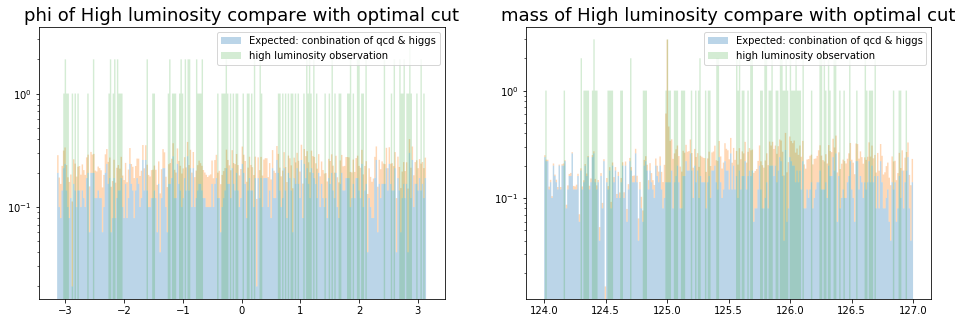

In [503]:
highCompareCut('phi',backphi, sigphi, 'mass', backmass, sigmass)

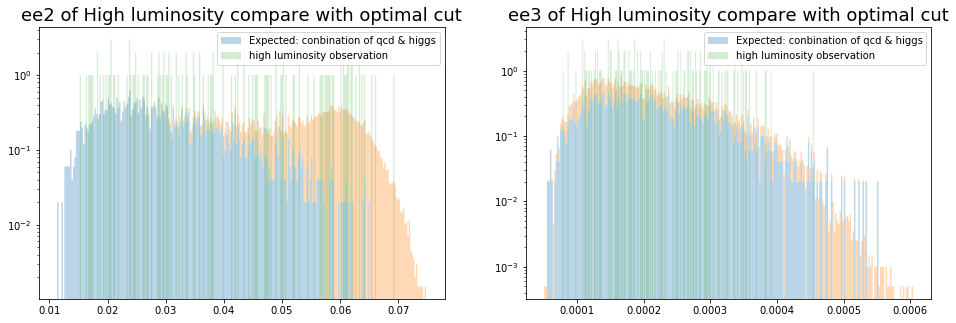

In [505]:
highCompareCut('ee2',backee2, sigee2, 'ee3', backee3, sigee3)

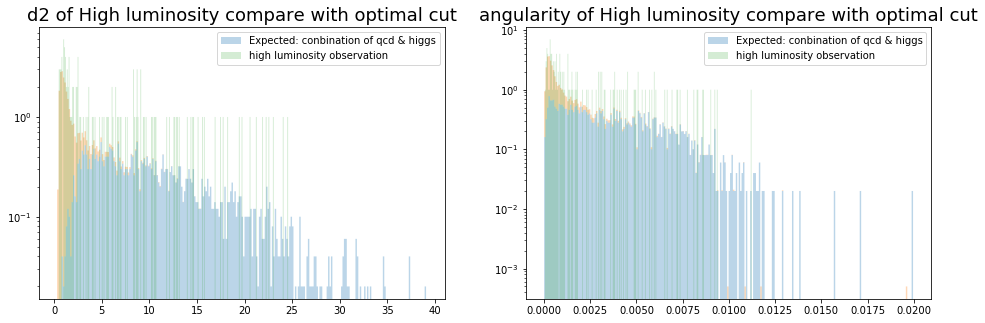

In [506]:
highCompareCut('d2',backd2, sigd2, 'angularity', backangularity, sigangularity)

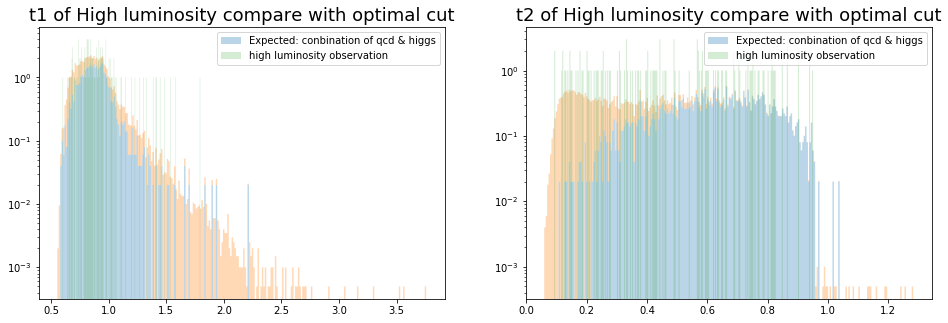

In [507]:
highCompareCut('t1',backt1, sigt1, 't2', backt2, sigt2)

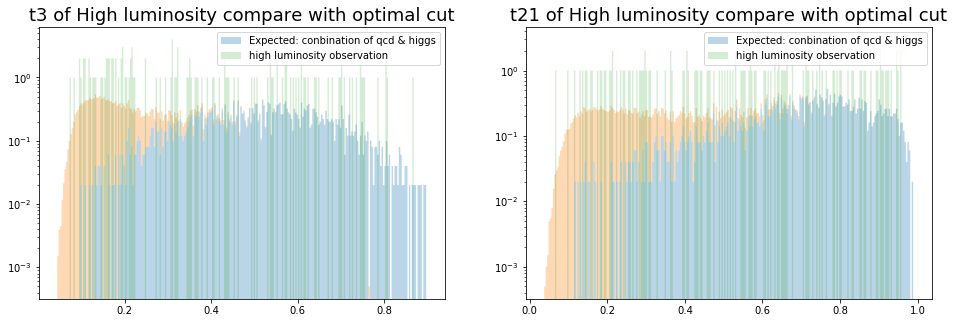

In [508]:
highCompareCut('t3',backt3, sigt3, 't21', backt21, sigt21)

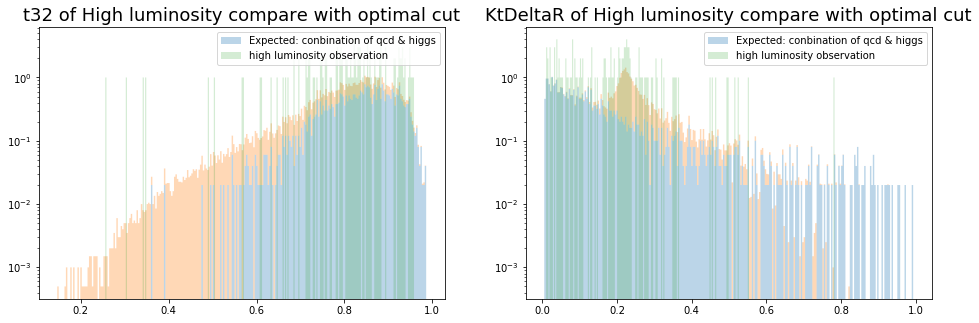

In [509]:
highCompareCut('t32',backt32, sigt32, 'KtDeltaR', backKtDeltaR, sigKtDeltaR)

In [510]:
b = qcd.get("mass")
s = higgs.get("mass")
bCount, sCount = 0, 0
for i in range(100000):
    if b[i] > 124 and b[i] < 127: bCount += 1
    if s[i] > 124 and s[i] < 127: sCount += 1
print("Expected # of background observation is", bCount/100000*2000)
print("Expected # of signal observation is", sCount/100000*50)
print("Expected total # of observation is", bCount/100000*2000 + sCount/100000*50)
print("Total low luminosity observation is", len(lowcut))

Expected # of background observation is 37.3
Expected # of signal observation is 23.215
Expected total # of observation is 60.515
Total high luminosity observation is 11
